# Data Pre Processing 

In [1]:
import pandas as pd

In [2]:
#read data from data set 
data1 = pd.read_csv("DataSets/col_mat_nuw_output.csv",header = None)
data2 = pd.read_csv("DataSets/kan_output.csv", header=None)
data3 = pd.read_csv("DataSets/mon_kur_jaf_output.csv", header=None)
data = pd.concat([data1,data2,data3])
data.shape

(12782, 4)

In [3]:
data.columns = ["HCHO reading", "Location", "Current Date", "Next Date"]
data

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [4]:
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

HCHO reading
[1.96983440e-04 2.62552217e-04 9.85211890e-05 ... 1.26723537e-04
 1.16658954e-04 6.54085299e-05]


Location
['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


Current Date
['2019-01-01' '2019-01-02' '2019-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']


Next Date
['2019-01-02' '2019-01-03' '2019-01-04' ... '2023-12-30' '2023-12-31'
 '2024-01-01']


In [5]:
colombo_df = data[data['Location'] == "Colombo Proper"]
jaffna_df = data[data['Location'] == "Jaffna Proper"]
deniyaya_df = data[data['Location'] == "Deniyaya, Matara"]
nuwaraEliya_df = data[data['Location'] == "Nuwara Eliya Proper"]
kandy_df = data[data['Location'] == "Kandy Proper"]
bibile_df = data[data['Location'] == "Bibile, Monaragala"]
kurunegala_df = data[data['Location'] == "Kurunegala Proper"]

In [6]:
colombo_df

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000118,Colombo Proper,2023-12-27,2023-12-28
1822,NaN,Colombo Proper,2023-12-28,2023-12-29
1823,NaN,Colombo Proper,2023-12-29,2023-12-30
1824,0.000140,Colombo Proper,2023-12-30,2023-12-31


In [7]:
jaffna_df

,HCHO reading,Location,Current Date,Next Date
3652,0.000058,Jaffna Proper,2019-01-01,2019-01-02
3653,0.000102,Jaffna Proper,2019-01-02,2019-01-03
3654,0.000039,Jaffna Proper,2019-01-03,2019-01-04
3655,-0.000002,Jaffna Proper,2019-01-04,2019-01-05
3656,0.000159,Jaffna Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [8]:
deniyaya_df

,HCHO reading,Location,Current Date,Next Date
1826,NaN,"Deniyaya, Matara",2019-01-01,2019-01-02
1827,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
1828,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04
1829,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05
1830,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000228,"Deniyaya, Matara",2023-12-27,2023-12-28
3648,NaN,"Deniyaya, Matara",2023-12-28,2023-12-29
3649,NaN,"Deniyaya, Matara",2023-12-29,2023-12-30
3650,0.000116,"Deniyaya, Matara",2023-12-30,2023-12-31


In [9]:
nuwaraEliya_df

,HCHO reading,Location,Current Date,Next Date
3652,NaN,Nuwara Eliya Proper,2019-01-01,2019-01-02
3653,NaN,Nuwara Eliya Proper,2019-01-02,2019-01-03
3654,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
3655,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
3656,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [10]:
kandy_df

,HCHO reading,Location,Current Date,Next Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [11]:
bibile_df

,HCHO reading,Location,Current Date,Next Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,"Bibile, Monaragala",2023-12-27,2023-12-28
1822,NaN,"Bibile, Monaragala",2023-12-28,2023-12-29
1823,NaN,"Bibile, Monaragala",2023-12-29,2023-12-30
1824,NaN,"Bibile, Monaragala",2023-12-30,2023-12-31


In [12]:
kurunegala_df

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
1827,0.000137,Kurunegala Proper,2019-01-02,2019-01-03
1828,0.000148,Kurunegala Proper,2019-01-03,2019-01-04
1829,-0.000002,Kurunegala Proper,2019-01-04,2019-01-05
1830,0.000249,Kurunegala Proper,2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000075,Kurunegala Proper,2023-12-27,2023-12-28
3648,NaN,Kurunegala Proper,2023-12-28,2023-12-29
3649,NaN,Kurunegala Proper,2023-12-29,2023-12-30
3650,0.000158,Kurunegala Proper,2023-12-30,2023-12-31


In [13]:
colombo_df.isnull().sum()

HCHO reading    487
Location          0
Current Date      0
Next Date         0
dtype: int64

In [14]:
#Filling null values using mode method
colombo_df_mode_value = colombo_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
colombo_df['HCHO reading'].fillna(colombo_df_mode_value, inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_6948\3565745044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colombo_df['HCHO reading'].fillna(colombo_df_mode_value, inplace=True)


In [15]:
colombo_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [16]:
jaffna_df.isnull().sum()

HCHO reading    365
Location          0
Current Date      0
Next Date         0
dtype: int64

In [17]:
jaffna_mode_value = jaffna_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
jaffna_df['HCHO reading'].fillna(jaffna_mode_value, inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_6948\3096387436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaffna_df['HCHO reading'].fillna(jaffna_mode_value, inplace=True)


In [18]:
jaffna_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [19]:
kandy_df.isnull().sum()

HCHO reading    793
Location          0
Current Date      0
Next Date         0
dtype: int64

In [20]:
kandy_mode_value = kandy_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
kandy_df['HCHO reading'].fillna(kandy_mode_value, inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_6948\3838777035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kandy_df['HCHO reading'].fillna(kandy_mode_value, inplace=True)


In [21]:
kandy_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [22]:
nuwaraEliya_df.isnull().sum()

HCHO reading    1085
Location           0
Current Date       0
Next Date          0
dtype: int64

In [23]:
nuwaraEliya_mode_value = nuwaraEliya_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
nuwaraEliya_df['HCHO reading'].fillna(nuwaraEliya_mode_value, inplace = True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_6948\2630545475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuwaraEliya_df['HCHO reading'].fillna(nuwaraEliya_mode_value, inplace = True)


In [24]:
nuwaraEliya_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [25]:
bibile_df.isnull().sum()

HCHO reading    695
Location          0
Current Date      0
Next Date         0
dtype: int64

In [26]:
bibille_mode_value = bibile_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
bibile_df['HCHO reading'].fillna(bibille_mode_value, inplace = True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_6948\2566195689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bibile_df['HCHO reading'].fillna(bibille_mode_value, inplace = True)


In [27]:
bibile_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [28]:
deniyaya_df.isnull().sum()

HCHO reading    847
Location          0
Current Date      0
Next Date         0
dtype: int64

In [29]:
deniyaya_mode_value =deniyaya_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
deniyaya_df["HCHO reading"].fillna(deniyaya_mode_value, inplace = True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_6948\3225443557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deniyaya_df["HCHO reading"].fillna(deniyaya_mode_value, inplace = True)


In [30]:
deniyaya_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [31]:
kurunegala_df.isnull().sum()

HCHO reading    592
Location          0
Current Date      0
Next Date         0
dtype: int64

In [32]:
kurunegala_mode_value =kurunegala_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
kurunegala_df["HCHO reading"].fillna(kurunegala_mode_value,inplace = True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_6948\445054732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kurunegala_df["HCHO reading"].fillna(kurunegala_mode_value,inplace = True)


In [33]:
kurunegala_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

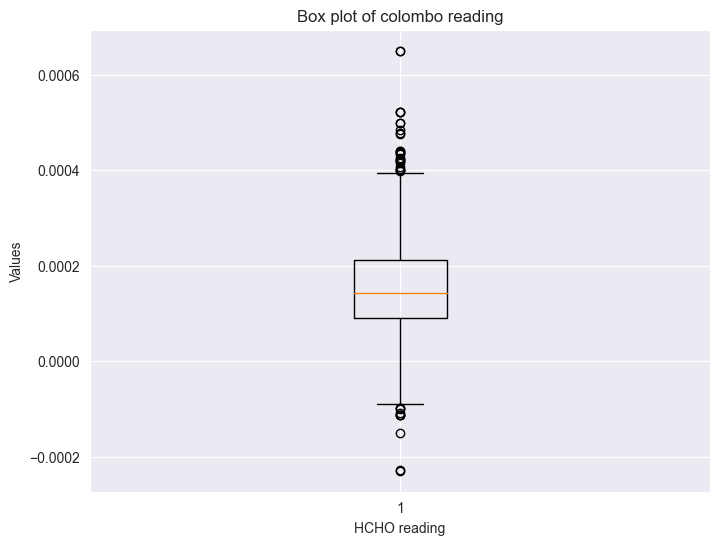

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(colombo_df['HCHO reading'])
plt.title('Box plot of colombo reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

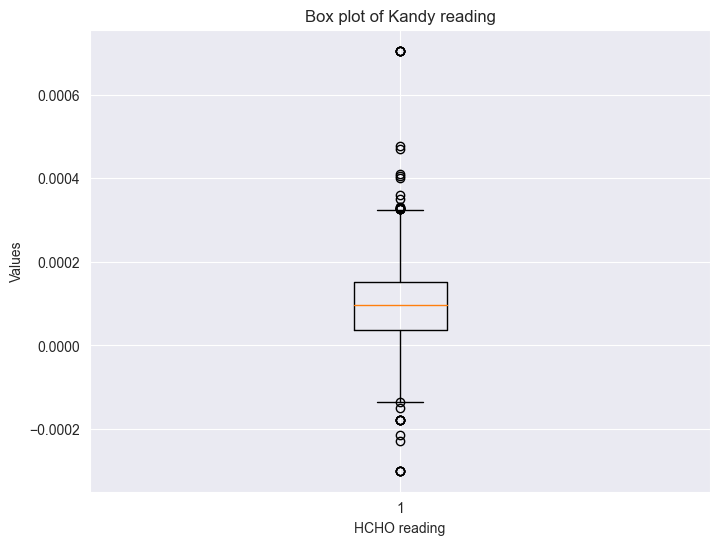

In [35]:
plt.figure(figsize=(8, 6))
plt.boxplot(kandy_df['HCHO reading'])
plt.title('Box plot of Kandy reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

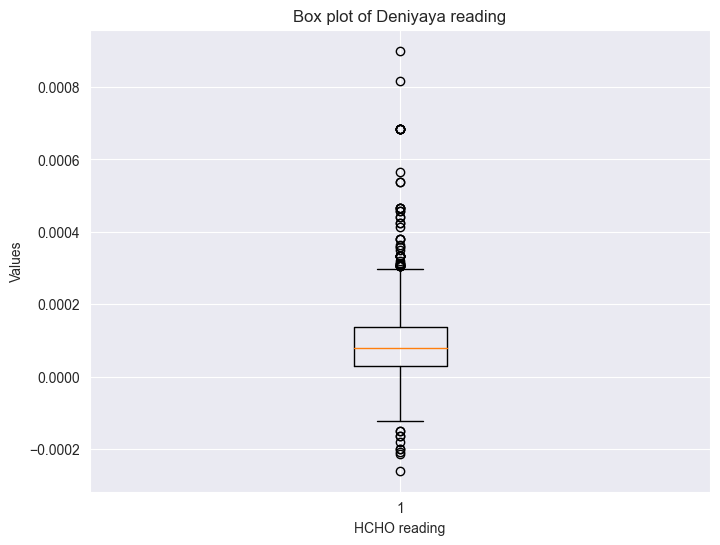

In [36]:
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [37]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = deniyaya_df['HCHO reading'].quantile(0.25)
Q3 = deniyaya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = deniyaya_df['HCHO reading'][deniyaya_df['HCHO reading'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

Upper bound within the boxplot: 0.0002964527594232


In [38]:
deniyaya_df = deniyaya_df.drop(deniyaya_df[(deniyaya_df['HCHO reading'] >= 0.0005638530012409)].index)

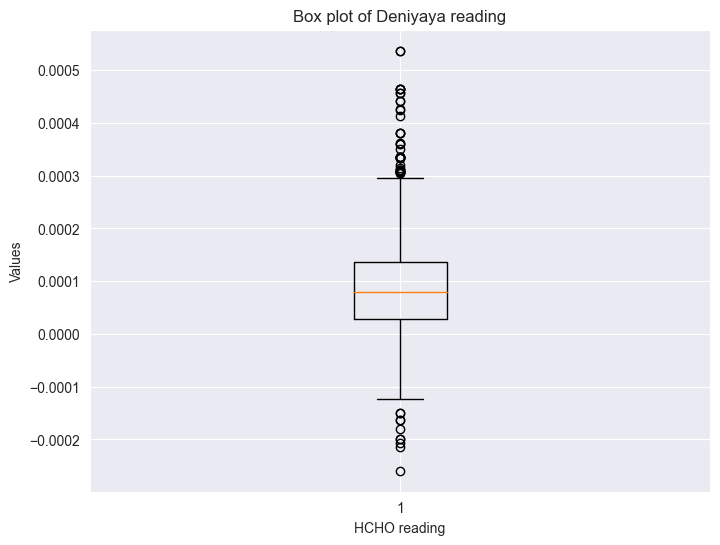

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

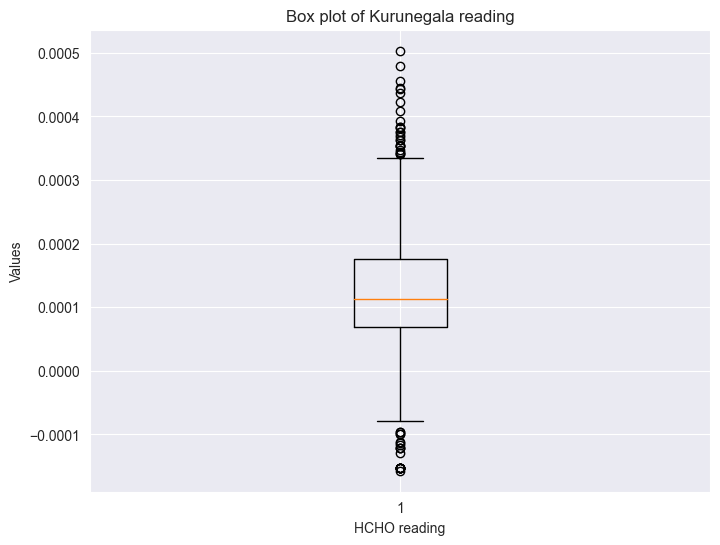

In [40]:
plt.figure(figsize=(8, 6))
plt.boxplot(kurunegala_df['HCHO reading'])
plt.title('Box plot of Kurunegala reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

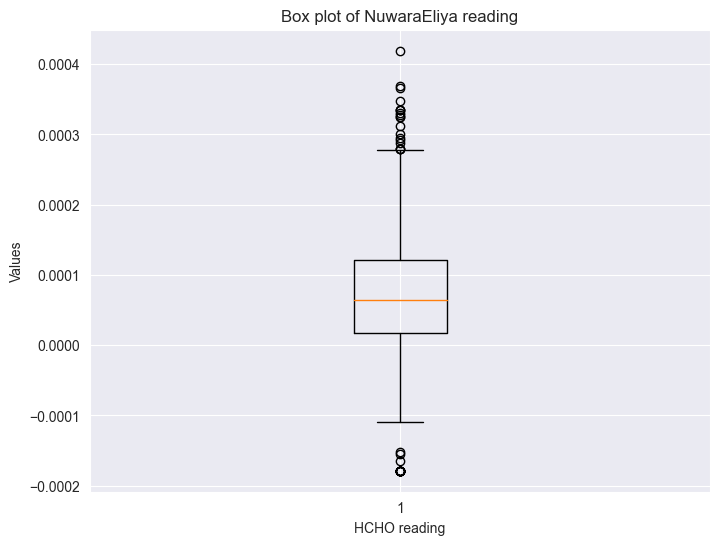

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [42]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = nuwaraEliya_df['HCHO reading'].quantile(0.25)
Q3 = nuwaraEliya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = nuwaraEliya_df['HCHO reading'][nuwaraEliya_df['HCHO reading'] <= upper_whisker].max()


print("Upper bound within the boxplot:", upper_bound_data)

Upper bound within the boxplot: 0.0002771661984116


In [43]:
nuwaraEliya_df = nuwaraEliya_df.drop(nuwaraEliya_df[(nuwaraEliya_df['HCHO reading'] >= 0.0003689670671425)].index)

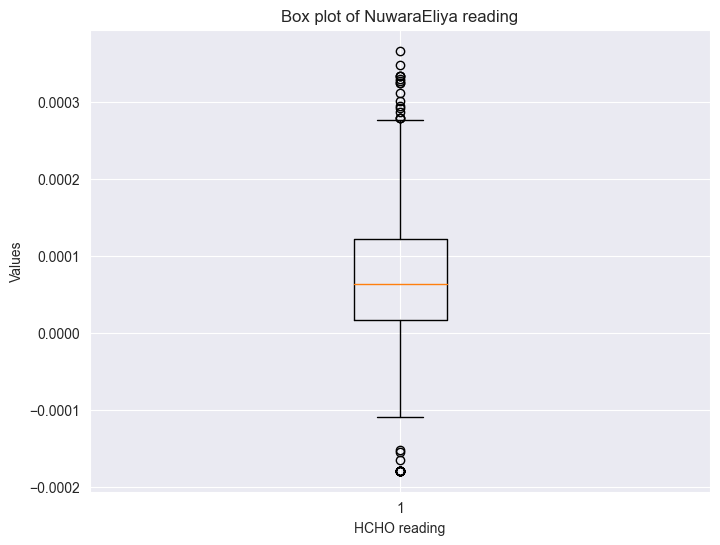

In [44]:
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

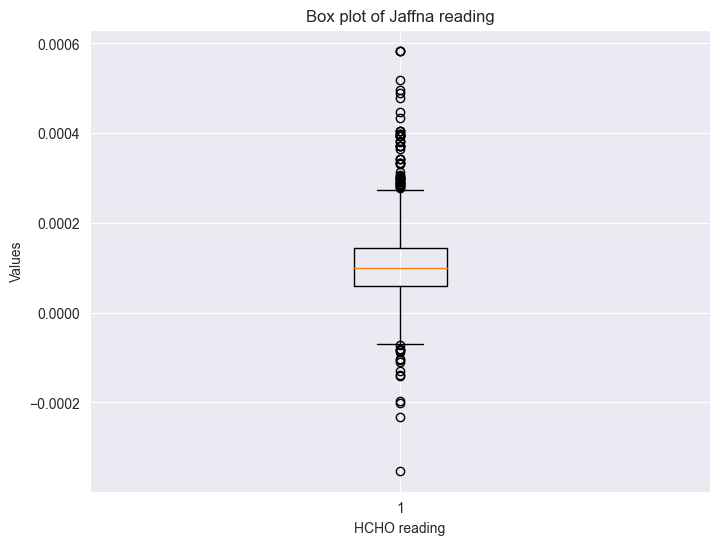

In [45]:
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [46]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = jaffna_df['HCHO reading'].quantile(0.25)
Q3 = jaffna_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0002729933174109
Lower bound within the boxplot: -6.91114370543075e-05


In [47]:
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] >= 0.000307007082162)].index)
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] <= -0.0001409249825353)].index)

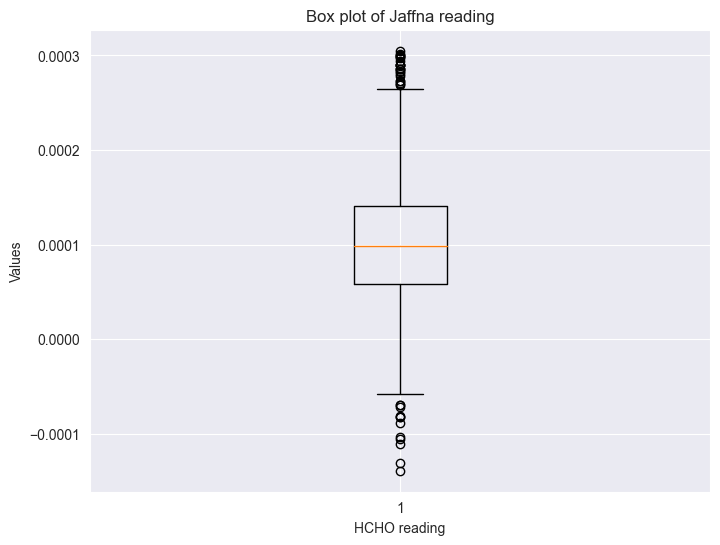

In [48]:
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

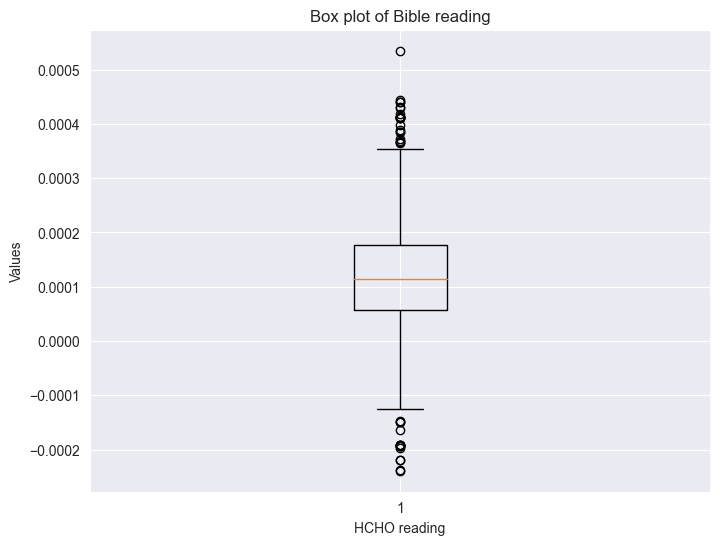

In [49]:
plt.figure(figsize=(8, 6))
plt.boxplot(bibile_df['HCHO reading'])
plt.title('Box plot of Bible reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [50]:
colombo_df["Current Date"].duplicated().sum()

0

In [51]:
colombo_df["Next Date"].duplicated().sum()

0

In [52]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [53]:
result = adfuller(colombo_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -4.815579
p-value: 0.000051
	1%: -3.434
	5%: -2.863
	10%: -2.568
The dataframe is stationary


In [54]:
result = adfuller(kandy_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -12.409392
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
The dataframe is stationary


In [55]:
result = adfuller(bibile_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -5.774069
p-value: 0.000001
	1%: -3.434
	5%: -2.863
	10%: -2.568
5.309545438436768e-07
The dataframe is stationary


In [56]:
result = adfuller(kurunegala_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("the The dataframe is stationary")
    

ADF Statistic: -7.987862
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
2.5204950033302695e-12
the The dataframe is stationary


In [57]:
result = adfuller(jaffna_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -6.695546
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
4.008304170888003e-09
The dataframe is stationary


In [58]:
result = adfuller(nuwaraEliya_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -11.338915
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
1.0665408960737032e-20
The dataframe is stationary


In [59]:
result = adfuller(deniyaya_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -16.124882
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
4.8539087099264634e-29
The dataframe is stationary


In [60]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [61]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(colombo_df) * split_ratio)
train_data, test_data = colombo_df[0:train_size], colombo_df[train_size:]

# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

RMSE: 0.00010340039179900689
MSE: 1.0691641024188131e-08
MAPE: 143.5945262105585


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(nuwaraEliya_df) * split_ratio)
train_data, test_data = nuwaraEliya_df[0:train_size], nuwaraEliya_df[train_size:]

# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 0.00010988975542743162
MSE: 1.2075758347900736e-08
MAPE: 101.315512731711


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [63]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(deniyaya_df) * split_ratio)
train_data, test_data = deniyaya_df[0:train_size], deniyaya_df[train_size:]

# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 9.428983400399764e-05
MSE: 8.890572796501429e-09
MAPE: 2918.7776498339977


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [87]:
# Split data into training and testing sets (July month)
train_size = int(len(kandy_df) * 0.8)
train_data, test_data = kandy_df[0:train_size], kandy_df[train_size:]



# Define ARIMA model (replace the order with best fit for your data)
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(end = 1800)
# forecast_values = forecast.predicted_mean
# print(forecast_values.iloc[-1])
print(model_fit.summary())
# # Predict HCHO values for July month
# predicted_values = model_fit.forecast(steps=len(test_data))
# 
# # Prepare data for graphs
# actual_values = test_data[hcho_column].tolist()
# dates = test_data['Current Date'].tolist()

# # Create the first graph (Actual vs Predicted HCHO values)
import matplotlib.pyplot as plt
# 
# plt.figure(figsize=(10, 6))
# plt.plot(dates, actual_values, marker='o', label='Actual HCHO')
# plt.plot(dates, predicted_values, marker='x', label='Predicted HCHO')
# plt.title('Actual vs Predicted HCHO Values in July')
# plt.xlabel('Date')
# plt.ylabel('HCHO Value')
# plt.legend()
# plt.grid(True)
# plt.show()
# 
# # Create the second graph (Error between Actual and Predicted)
# errors = [abs(actual - predicted) for actual, predicted in zip(actual_values, predicted_values)]
# 
# plt.figure(figsize=(10, 6))
# plt.plot(dates, errors, marker='o', label='Abs Error')
# plt.title('Absolute Error between Actual and Predicted HCHO Values')
# plt.xlabel('Date')
# plt.ylabel('Absolute Error')
# plt.legend()
# plt.grid(True)
# plt.show()

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1460
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11604.709
Date:                Mon, 15 Apr 2024   AIC                         -23205.419
Time:                        19:11:15   BIC                         -23194.848
Sample:                             0   HQIC                        -23201.475
                               - 1460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3019   8.88e-20   -3.4e+18      0.000      -0.302      -0.302
sigma2      7.226e-09   1.27e-10     57.082      0.000    6.98e-09    7.47e-09
Ljung-Box (L1) (Q):                   3.89   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0       0.000000
1       0.000176
2       0.000118
3       0.000161
4       0.000191
          ...   
1455    0.000069
1456    0.000069
1457    0.000069
1458   -0.000017
1459   -0.000003
Name: predicted_mean, Length: 1460, dtype: float64

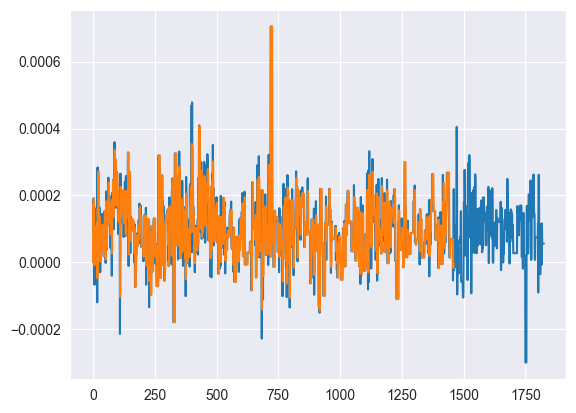

In [86]:
kandy_df["HCHO reading"].plot()
forecast.plot()
forecast


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


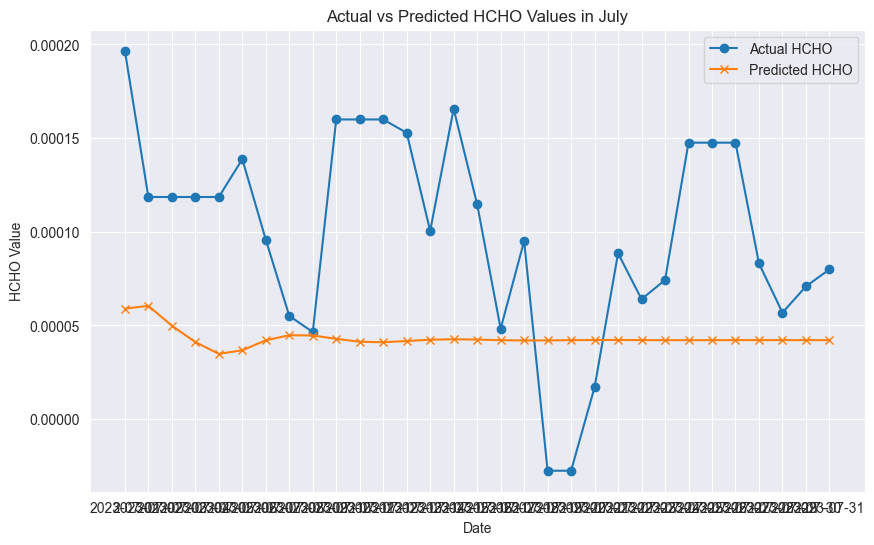

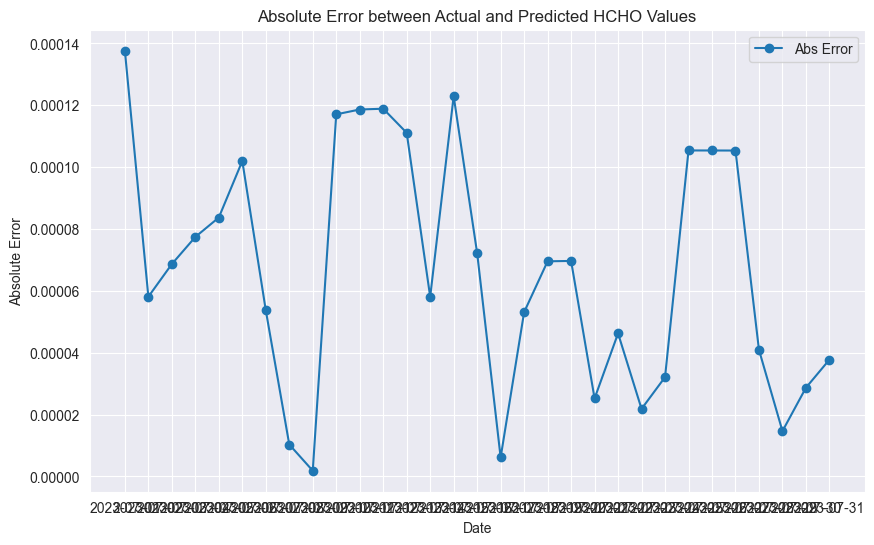

In [80]:
# Assuming your dataframe is named 'colombo_df'
# Load data up to July 2023
colombo_df = colombo_df[colombo_df['Current Date'] <= '2023-07-31']

# Split data into training and testing sets (July month)
train_data = colombo_df[colombo_df['Current Date'] < '2023-07-01']
test_data = colombo_df[colombo_df['Current Date'] >= '2023-07-01']

# Identify the HCHO column
hcho_column = 'HCHO reading'  # Replace with the actual column name for HCHO values

# Define ARIMA model (replace the order with best fit for your data)
model = ARIMA(train_data[hcho_column], order=(5, 1, 1))
model_fit = model.fit()

# Predict HCHO values for July month
predicted_values = model_fit.forecast(steps=len(test_data))

# Prepare data for graphs
actual_values = test_data[hcho_column].tolist()
dates = test_data['Current Date'].tolist()

# Create the first graph (Actual vs Predicted HCHO values)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, marker='o', label='Actual HCHO')
plt.plot(dates, predicted_values, marker='x', label='Predicted HCHO')
plt.title('Actual vs Predicted HCHO Values in July')
plt.xlabel('Date')
plt.ylabel('HCHO Value')
plt.legend()
plt.grid(True)
plt.show()

# Create the second graph (Error between Actual and Predicted)
errors = [abs(actual - predicted) for actual, predicted in zip(actual_values, predicted_values)]

plt.figure(figsize=(10, 6))
plt.plot(dates, errors, marker='o', label='Abs Error')
plt.title('Absolute Error between Actual and Predicted HCHO Values')
plt.xlabel('Date')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


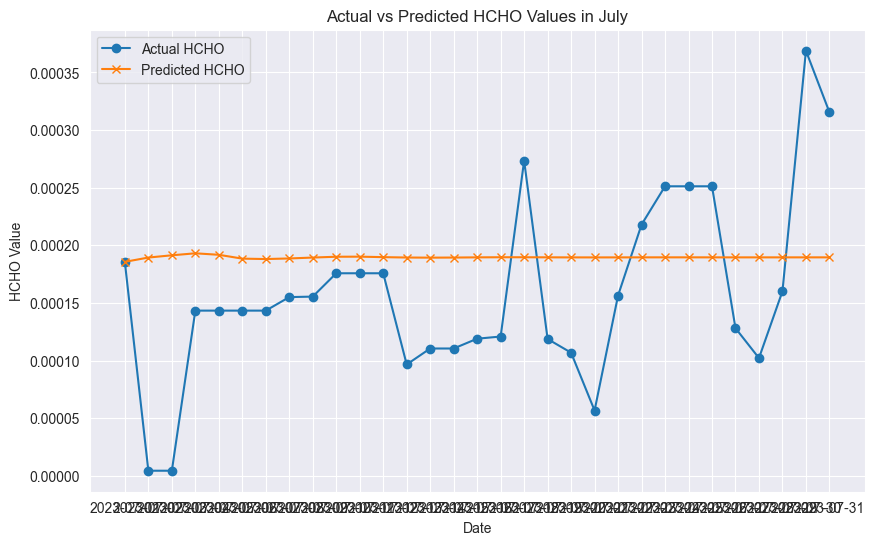

In [81]:
# Assuming your dataframe is named 'colombo_df'
# Load data up to July 2023
bibile_df = bibile_df[bibile_df['Current Date'] <= '2023-07-31']

# Split data into training and testing sets (July month)
train_data = bibile_df[bibile_df['Current Date'] < '2023-07-01']
test_data = bibile_df[bibile_df['Current Date'] >= '2023-07-01']

# Identify the HCHO column
hcho_column = 'HCHO reading'  # Replace with the actual column name for HCHO values

# Define ARIMA model (replace the order with best fit for your data)
model = ARIMA(train_data[hcho_column], order=(5, 1, 1))
model_fit = model.fit()

# Predict HCHO values for July month
predicted_values = model_fit.forecast(steps=len(test_data))

# Prepare data for graphs
actual_values = test_data[hcho_column].tolist()
dates = test_data['Current Date'].tolist()

# Create the first graph (Actual vs Predicted HCHO values)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, marker='o', label='Actual HCHO')
plt.plot(dates, predicted_values, marker='x', label='Predicted HCHO')
plt.title('Actual vs Predicted HCHO Values in July')
plt.xlabel('Date')
plt.ylabel('HCHO Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assuming your dataframe is named 'colombo_df'
# Load data up to July 2023
nuwaraEliya_df = nuwaraEliya_df[nuwaraEliya_df['Current Date'] <= '2023-07-31']

# Split data into training and testing sets (July month)
train_data = nuwaraEliya_df[nuwaraEliya_df['Current Date'] < '2023-07-01']
test_data = nuwaraEliya_df[nuwaraEliya_df['Current Date'] >= '2023-07-01']

# Identify the HCHO column
hcho_column = 'HCHO reading'  # Replace with the actual column name for HCHO values

# Define ARIMA model (replace the order with best fit for your data)
model = ARIMA(train_data[hcho_column], order=(5, 1, 1))
model_fit = model.fit()

# Predict HCHO values for July month
predicted_values = model_fit.forecast(steps=len(test_data))

# Prepare data for graphs
actual_values = test_data[hcho_column].tolist()
dates = test_data['Current Date'].tolist()

# Create the first graph (Actual vs Predicted HCHO values)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, marker='o', label='Actual HCHO')
plt.plot(dates, predicted_values, marker='x', label='Predicted HCHO')
plt.title('Actual vs Predicted HCHO Values in July')
plt.xlabel('Date')
plt.ylabel('HCHO Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assuming your dataframe is named 'colombo_df'
# Load data up to July 2023
deniyaya_df = deniyaya_df[deniyaya_df['Current Date'] <= '2023-07-31']

# Split data into training and testing sets (July month)
train_data = deniyaya_df[deniyaya_df['Current Date'] < '2023-07-01']
test_data = deniyaya_df[deniyaya_df['Current Date'] >= '2023-07-01']

# Identify the HCHO column
hcho_column = 'HCHO reading'  # Replace with the actual column name for HCHO values

# Define ARIMA model (replace the order with best fit for your data)
model = ARIMA(train_data[hcho_column], order=(5, 1, 1))
model_fit = model.fit()

# Predict HCHO values for July month
predicted_values = model_fit.forecast(steps=len(test_data))

# Prepare data for graphs
actual_values = test_data[hcho_column].tolist()
dates = test_data['Current Date'].tolist()

# Create the first graph (Actual vs Predicted HCHO values)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, marker='o', label='Actual HCHO')
plt.plot(dates, predicted_values, marker='x', label='Predicted HCHO')
plt.title('Actual vs Predicted HCHO Values in July')
plt.xlabel('Date')
plt.ylabel('HCHO Value')
plt.legend()
plt.grid(True)
plt.show()